In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,accuracy_score)

In [ ]:

games = pd.read_csv("games.csv")
games_details = pd.read_csv("games_details.csv")
players = pd.read_csv("players.csv")
ranking = pd.read_csv("ranking.csv")
teams = pd.read_csv("teams.csv")

FileNotFoundError: ignored

In [ ]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [ ]:
games_details = pd.read_csv("games_details.csv")
games_details

<ipython-input-4-ef169df2346e>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("games_details.csv")


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142218,40700165,1610612756,PHX,Phoenix,1752,Sean Marks,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142219,40700165,1610612756,PHX,Phoenix,15,Eric Piatkowski,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142220,40700165,1610612756,PHX,Phoenix,201199,DJ Strawberry,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142221,40700165,1610612756,PHX,Phoenix,201169,Alando Tucker,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
players = pd.read_csv("players.csv")
players

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [ ]:
ranking = pd.read_csv("ranking.csv")
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [ ]:
teams = pd.read_csv("teams.csv")
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


# **EDA #1 QUANTITATIVE:** Heat map for logistic regression variables

In [ ]:
#Need it for me to access the data
from google.colab import drive
drive.mount('/content/drive')

basha_games = pd.read_csv("/content/drive/MyDrive/games.csv")
basha_rankings = pd.read_csv("/content/drive/MyDrive/ranking.csv")
basha_teams = pd.read_csv("/content/drive/MyDrive/ranking.csv")
basha_players = pd.read_csv("/content/drive/MyDrive/players.csv")
basha_games_details = pd.read_csv("/content/drive/MyDrive/games_details.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-46-191190fb0741>:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  basha_games_details = pd.read_csv("/content/drive/MyDrive/games_details.csv")


In [ ]:
basha_games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [ ]:
is_na = basha_games_details[['FGM','FGA', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF']].dropna()
# 109690/668628
basha_games[['PTS_home', "PTS_away"]].shape[0] - basha_games[['PTS_home', "PTS_away"]].dropna().shape[0]
# 99/basha_games.shape[0]


99

In [ ]:
#Grouping the other features in the games_details 9 - 29, groupby game_id and teams
needed_cols = basha_games_details.loc[:,['FGM','FGA', 'FG3M', 'FG3A', 'FTM', 'FTA','OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF']]
needed_cols["GAME_ID"] = basha_games_details["GAME_ID"]
needed_cols["TEAM_ID"] = basha_games_details["TEAM_ID"]
# needed_cols["HOME_TEAM_WINS"] = basha_games["HOME_TEAM_WINS"]
grouped_details = needed_cols.groupby(by=["GAME_ID", "TEAM_ID"]).sum()
grouped_details = grouped_details.reset_index()
expanded_games_home  = basha_games.merge(grouped_details, right_on = ["GAME_ID", "TEAM_ID"], left_on=["GAME_ID", "HOME_TEAM_ID"])
expanded_games_away = basha_games.merge(grouped_details, right_on = ["GAME_ID", "TEAM_ID"], left_on=["GAME_ID", "VISITOR_TEAM_ID"])
#JULIA_USE THIS DATAFRAME FOR MODELS
# expanded_games_away.iloc[0], expanded_games_home.iloc[0] #Checking to make sure it's merged correctly
expanded_games_home = expanded_games_home.drop(columns=['TEAM_ID_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'TEAM_ID' ])
expanded_games_away = expanded_games_away.drop(columns=['TEAM_ID_away', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'TEAM_ID' ])
expanded_games_away.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'STL',
       'BLK', 'TO', 'PF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap: Aggegation of Features Vs. Total wins for each Team')

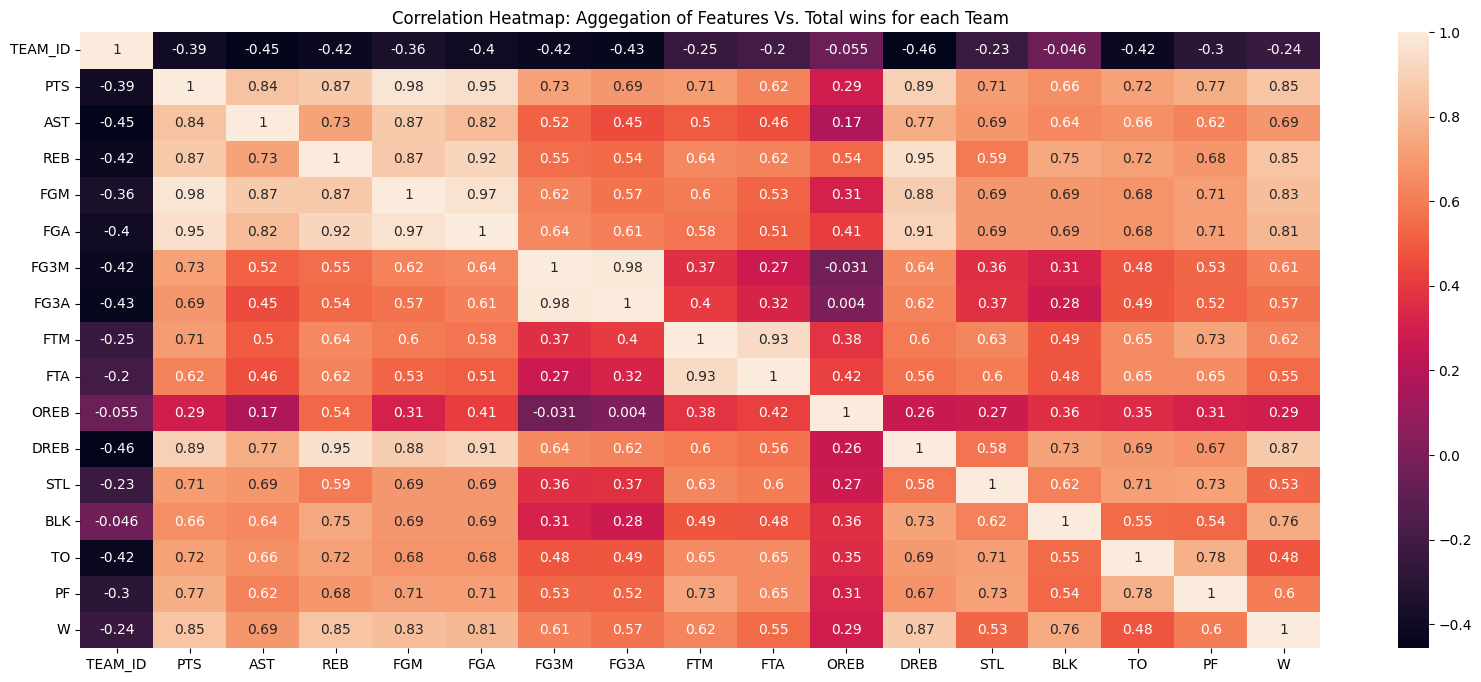

In [ ]:
#Building a Correaltion Heatmap
w_pct = basha_rankings[["TEAM_ID","W", "W_PCT"]].groupby("TEAM_ID").agg({"W": np.sum, "W_PCT": np.mean})
home_team_stats =  basha_games[["HOME_TEAM_ID", "PTS_home", "AST_home", "REB_home"]].rename({"HOME_TEAM_ID":"TEAM_ID", "PTS_home": "PTS", "AST_home":"AST", "REB_home":"REB"}, axis=1)
away_team_stats = basha_games[["VISITOR_TEAM_ID", "PTS_away", "AST_away", "REB_away"]].rename({"VISITOR_TEAM_ID":"TEAM_ID", "PTS_away": "PTS", "AST_away":"AST", "REB_away":"REB"}, axis=1)
concatenate = pd.concat([home_team_stats, away_team_stats])
avg_features = concatenate.groupby("TEAM_ID").sum().reset_index()
grouped_by_team = needed_cols.drop("GAME_ID", axis=1).groupby(by=["TEAM_ID"]).sum()
grouped_by_team = grouped_by_team.reset_index()
avg_features = avg_features.merge(grouped_by_team, right_on = ["TEAM_ID"], left_on= ["TEAM_ID"])
# avg_features["Wins %"] = w_pct["W_PCT"]
wins = pd.DataFrame(w_pct["W"])
avg_features = avg_features.merge(wins, right_on = ["TEAM_ID"], left_on= ["TEAM_ID"])

# import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
sns.heatmap(avg_features.corr(), annot=True)
plt.title("Correlation Heatmap: Aggegation of Features Vs. Total wins for each Team")


<ipython-input-54-c5a053051703>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(expanded_games_away.corr()[["Visitor_TEAM_WINS"]], annot=True)


Text(0.5, 1.0, 'Correlation Heatmap for Away Team')

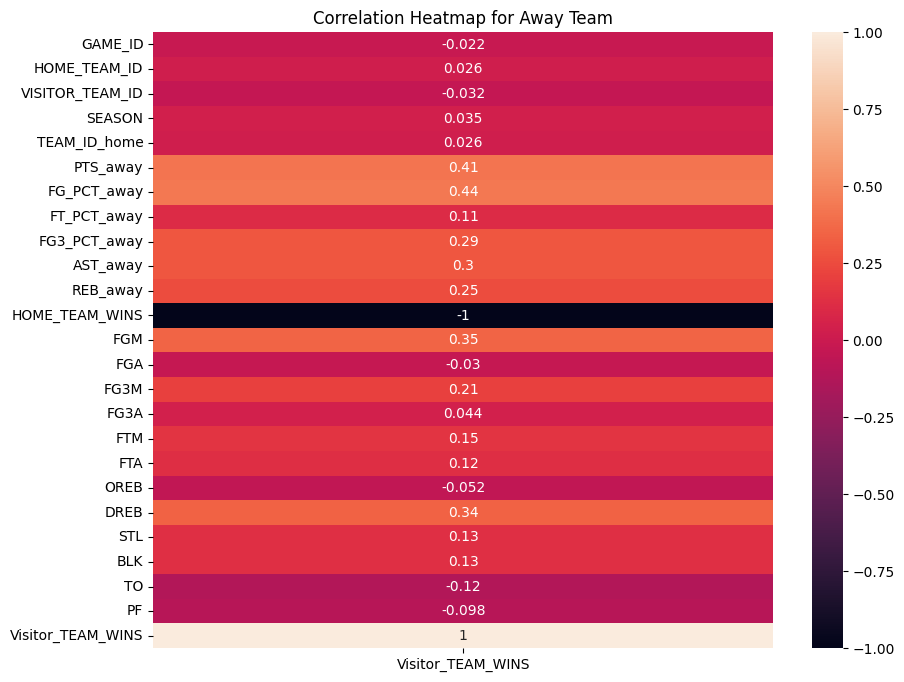

In [ ]:
#Creating a heatmap for the away team
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
expanded_games_away["Visitor_TEAM_WINS"] = 1 - expanded_games_away["HOME_TEAM_WINS"]
sns.heatmap(expanded_games_away.corr()[["Visitor_TEAM_WINS"]], annot=True)
plt.title("Correlation Heatmap for Away Team")

<ipython-input-53-949f1efc7a70>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(expanded_games_home.corr()[["HOME_TEAM_WINS"]], annot=True)


Text(0.5, 1.0, 'Correlation Heatmap for Home Team')

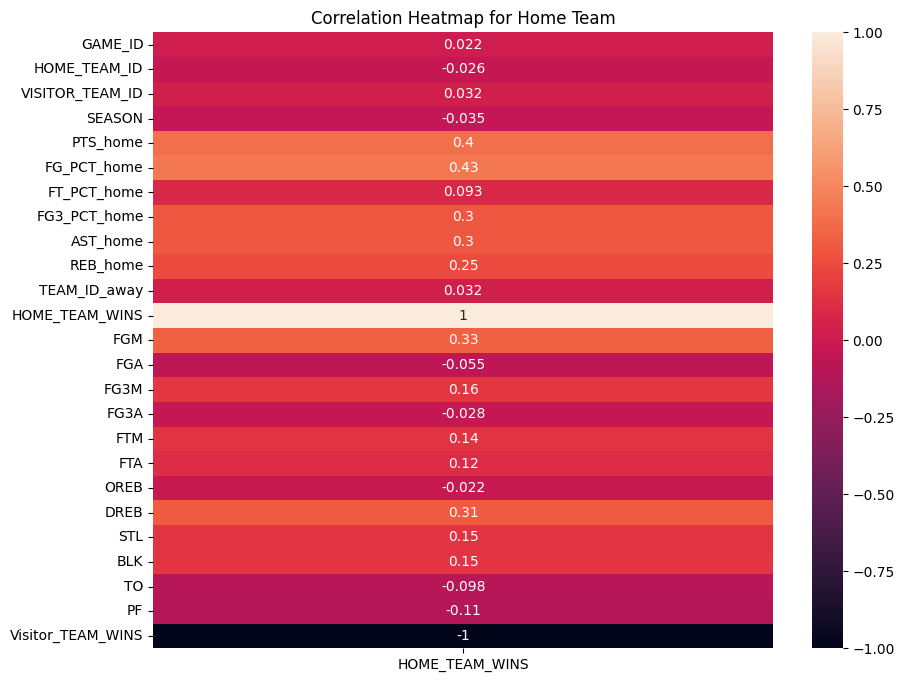

In [ ]:
#Creating a heatmap for the home team based on if the homw team wins or not
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
expanded_games_home["Visitor_TEAM_WINS"] = 1 - expanded_games_away["HOME_TEAM_WINS"]
sns.heatmap(expanded_games_home.corr()[["HOME_TEAM_WINS"]], annot=True)
# home_team_stats
plt.title("Correlation Heatmap for Home Team")

**Explanation of the Correlation Heatmap  [MUST MAKE EDITS TO EXPLANATION]**

The above of question relates to our second research question: Comparing random forests and logistic regression to predict which team will win out of a certain head to head match up, which one will do better? The graph above is a correlation heatmap, which gives us information on how correlated each feature is to one another. This is relevant information, as it will help us choose which features would be good to use when building our regression model. We are paticularly interested in how average points, assistants, and rebounds per game for each team is correlated with the percentage of wins for each game. From the visualization above, we see that average points and assists per game has a significant correlation coefficient. This would lead us to use the both features in our logistic regression model.

# **EDA #2 CATEGORICAL:** Analysis of points per game

This visualization will be focused on comparing teams' average PPG for teams when the star player is present on the team compared to when the star player is not present. The star player is defined as the player on the team which has the highest season PPG.

To simplify the visualization, we will be limiting this visualization to the 2021-2022 NBA season.

In [ ]:
games_details.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [ ]:
# define start and end dates of 2021-2022 NBA season
nba_season_start = pd.to_datetime('2021-10-19')  # NBA season typically starts in October
nba_season_end = pd.to_datetime('2022-04-14')    # NBA season typically ends in April
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

# get games only within 2022 season
games_22 = games[(games['GAME_DATE_EST'] >= nba_season_start) & (games['GAME_DATE_EST'] <= nba_season_end)]
team_names = games_details['TEAM_ABBREVIATION'].unique()[:-5]

# join games and games_details for dates; join on game_id
comp_games = pd.merge(games_22, games_details, on = 'GAME_ID', how = 'inner')

# dataframe of player names
player_names = comp_games[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION']].drop_duplicates()

# get the identity of the "star player" for every team
player_max_pts = comp_games.groupby('PLAYER_ID')[['TEAM_CITY', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION',
       'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'PTS']].mean().reset_index()
player_max_pts = pd.merge(player_max_pts, player_names, on = 'PLAYER_ID', how = 'inner')
player_max_indices = player_max_pts.groupby('TEAM_ABBREVIATION')['PTS'].idxmax()
star_players = player_max_pts.loc[player_max_indices][['PLAYER_ID', 'TEAM_ABBREVIATION']]

# create two datasets based on teams having star players or not having them
without_star_team_fgp = {}
with_star_team_fgp = {}

team = []
star_present = []
fgp = []
blk = []
tpp = [] #3PT
ast = []
stl = []
to = []

for t in team_names:
  games_star = comp_games[comp_games['PLAYER_ID'] == star_players[star_players['TEAM_ABBREVIATION'] == t]['PLAYER_ID'].iloc[0]]
  all_games = comp_games[comp_games['TEAM_ABBREVIATION'] == t]['GAME_ID'].drop_duplicates().values
  without_star = np.setdiff1d(all_games, games_star[['GAME_ID', 'MIN']].dropna()['GAME_ID'])
  with_star = np.setdiff1d(all_games, without_star)

  without_star_fgp = []
  with_star_fgp = []

  for g in without_star:
    game_stats = games_details[(games_details['GAME_ID'] == g) & (games_details['TEAM_ABBREVIATION'] == t)]
    without_star_fgp.append(game_stats['FG_PCT'].mean())
    team.append(t)
    fgp.append(game_stats['FG_PCT'].mean())
    blk.append(game_stats['BLK'].mean())
    tpp.append(game_stats['FG3_PCT'].mean())
    ast.append(game_stats['AST'].mean())
    stl.append(game_stats['BLK'].mean())
    to.append(game_stats['TO'].mean())
    star_present.append(0)

  for g in with_star:
    game_stats = games_details[(games_details['GAME_ID'] == g) & (games_details['TEAM_ABBREVIATION'] == t)]
    m = game_stats['FG_PCT'].mean()
    with_star_fgp.append(m)
    team.append(t)
    fgp.append(m)
    blk.append(game_stats['BLK'].mean())
    tpp.append(game_stats['FG3_PCT'].mean())
    ast.append(game_stats['AST'].mean())
    stl.append(game_stats['BLK'].mean())
    to.append(game_stats['TO'].mean())
    star_present.append(1)

  without_star_team_fgp[t] = np.mean(without_star_fgp)
  with_star_team_fgp[t] = np.mean(with_star_fgp)


<ipython-input-13-951812c137db>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'PTS']].mean().reset_index()


IndexError: ignored

In [ ]:
pd.merge(games_22, games_details, on = 'GAME_ID', how = 'left').columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION',
       'COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

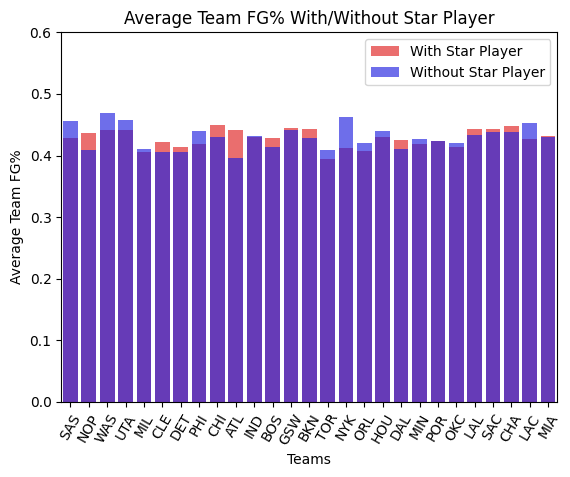

In [ ]:
# visualize
sns.barplot(x = list(with_star_team_fgp.keys()), y = list(with_star_team_fgp.values()), color = 'red', alpha = 0.65, label = 'With Star Player')
plt.title('Average Team FG% With/Without Star Player')
plt.xlabel('Teams')
plt.ylabel('Average Team FG%')
sns.barplot(x = list(without_star_team_fgp.keys()), y = list(without_star_team_fgp.values()), color = 'blue', alpha = 0.65, label = 'Without Star Player')
plt.legend()
plt.xticks(rotation = 60)
plt.ylim(0, 0.6)

plt.show()

**Explanation of the Two Bar Charts**

We can see here that at first glance, there doesn't appear to be a drastic difference in the average team field goal percentage when the star player plays or not. In terms of relevancy to our research question, we now know that using field goal percent as a metric may not make it clear as to whether the team has a higher or lower shooting accuracy when the star players are in the game. Of course, star players are only identified by having the highest PPG on their team that season; other aspects of their game such as assisting teammates, offensive rebounding, etc. may also play a role in average field goal percent changing when they are in the game. We will proceed with this knowledge.

## **EDA #3 QUANTITATIVE:** analysis of variables over the season

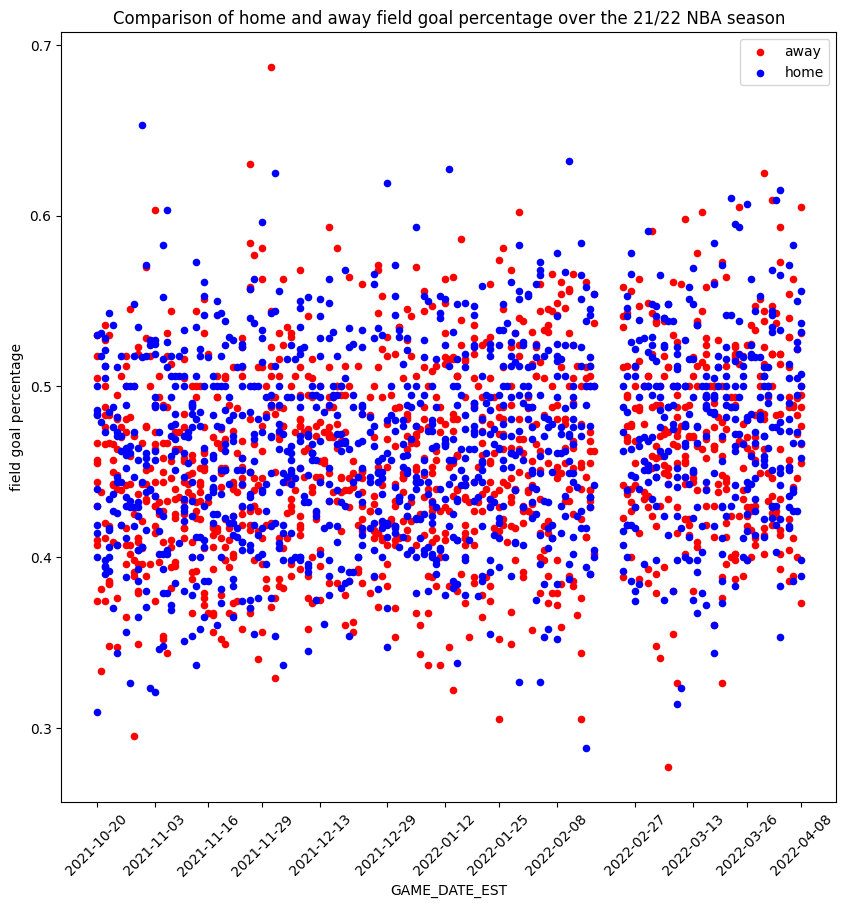

In [ ]:
mask = (games['GAME_DATE_EST'] < '2022-12-22') & (games['GAME_DATE_EST'] > '2021-12-22')
startRegularSeason21 = '2021-10-19'
endRegularSeason22 = '2022-04-09'
mask = (games['GAME_DATE_EST'] < endRegularSeason22) & (games['GAME_DATE_EST'] > startRegularSeason21)
ax1=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='FG_PCT_away', figsize=(10,10), color='r', label='away')
ax2=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='FG_PCT_home', figsize=(10,10), color='b', label='home', ax=ax1)
# games[mask].plot.scatter(x='GAME_DATE_EST', y=['FG_PCT_away'], figsize=(20,20))
plt.xticks(games[mask]["GAME_DATE_EST"][::100],  rotation=45)
plt.title("Comparison of home and away field goal percentage over the 21/22 NBA season")
plt.ylabel("field goal percentage")
plt.show()

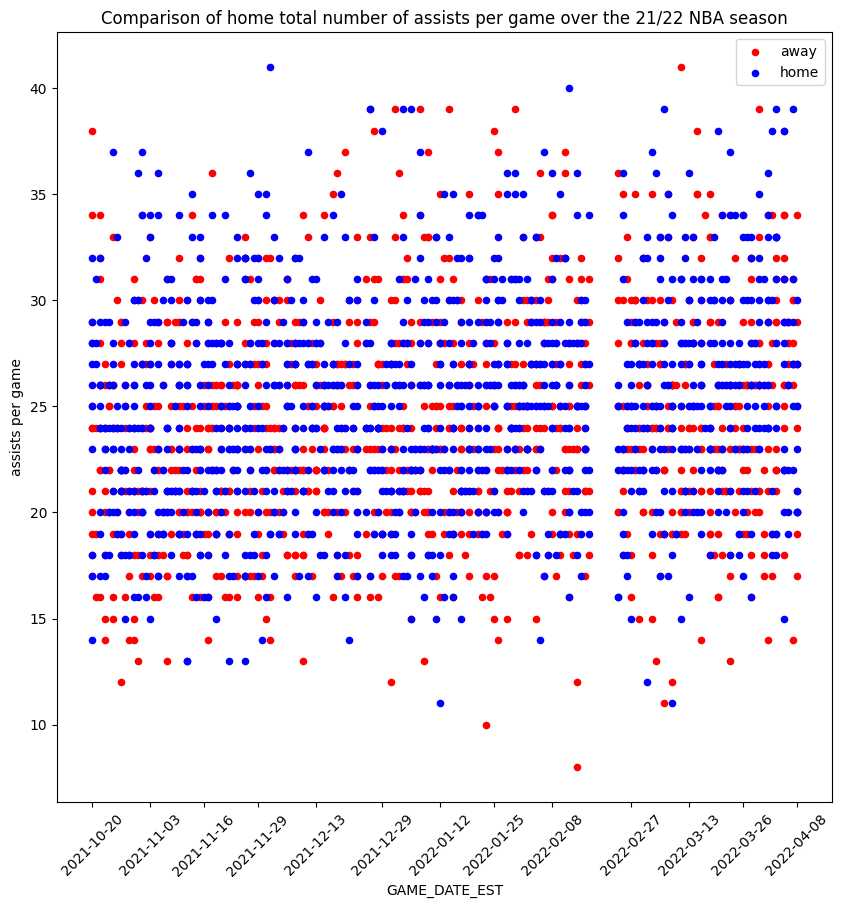

In [ ]:
startRegularSeason21 = '2021-10-19'
endRegularSeason22 = '2022-04-09'
mask = (games['GAME_DATE_EST'] < endRegularSeason22) & (games['GAME_DATE_EST'] > startRegularSeason21)
ax1=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='AST_away', figsize=(10,10), color='r', label='away')
ax2=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='AST_home', figsize=(10,10), color='b', label='home', ax=ax1)
# games[mask].plot.scatter(x='GAME_DATE_EST', y=['AST_home'], figsize=(10,10))
plt.xticks(games[mask]["GAME_DATE_EST"][::100],  rotation=45)
plt.title("Comparison of home total number of assists per game over the 21/22 NBA season")
plt.ylabel("assists per game")
plt.show()

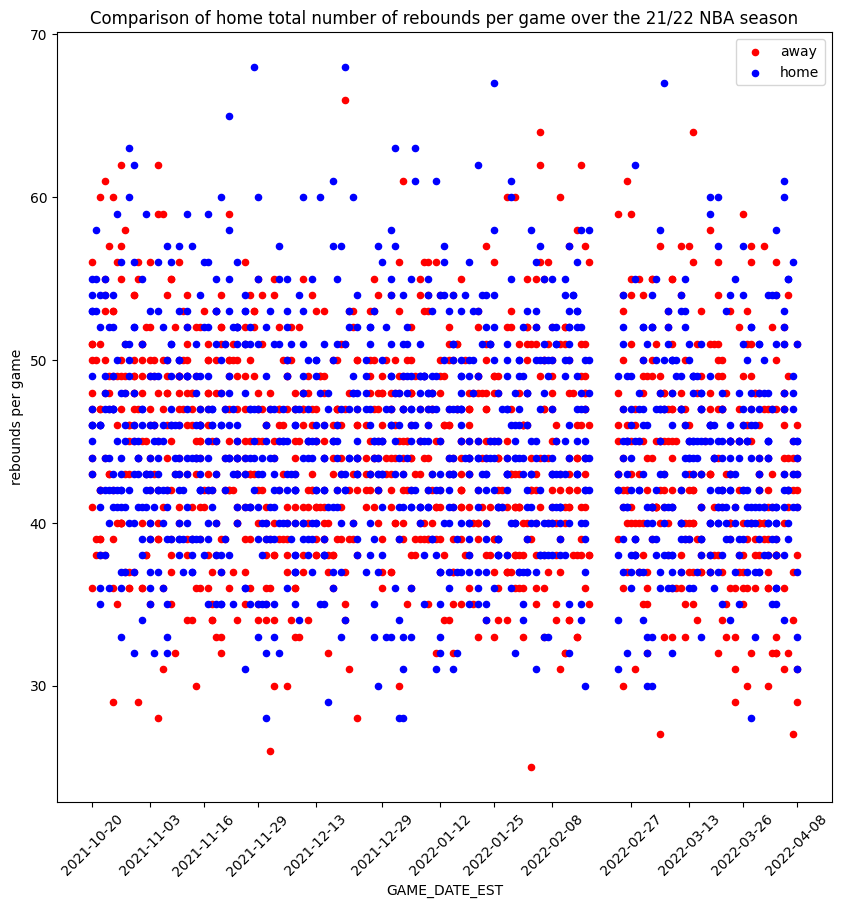

In [ ]:
startRegularSeason21 = '2021-10-19'
endRegularSeason22 = '2022-04-09'
mask = (games['GAME_DATE_EST'] < endRegularSeason22) & (games['GAME_DATE_EST'] > startRegularSeason21)
ax1=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='REB_away', figsize=(10,10), color='r', label='away')
ax2=games[mask].plot(kind='scatter', x='GAME_DATE_EST', y='REB_home', figsize=(10,10), color='b', label='home', ax=ax1)
# games[mask].plot.scatter(x='GAME_DATE_EST', y=['REB_home'], figsize=(10,10))
plt.xticks(games[mask]["GAME_DATE_EST"][::100],  rotation=45)
plt.title("Comparison of home total number of rebounds per game over the 21/22 NBA season")
plt.ylabel("rebounds per game")
plt.show()

**Explanation of the above graphs**

We were interested in how different stats change over the course of the season, if at all, and in comparing home vs. away teams for these. This is in reference to our second research question: Can we use random forests and logistic regression to predict which team will win out of a certain head to head match up. From the graphs above, we can see that there isn't much of a change over the course of a season in terms of these variables. And the trends don't change much between the home or away team. That's helpful in picking variables for our regression. Since there isn't much of a change over time in these, then we're probably accurate throughout the regular season with our estimation, no matter for which time period we use our model to predict. We're also going to be fairly accurate for the home or away team since they both seem pretty similar. So, we can stick with just one model with the most correlated variables, and can use that model to predict any point in the regular season.

# **EDA #4: CATEGORICAL:** look at team's win percentages over years, pick a few teams

In [ ]:
import pandas as pd


games_details_path = 'games_details.csv'
games_path = 'games.csv'
players_path = 'players.csv'
ranking_path = 'ranking.csv'
teams_path = 'teams.csv'


games_details_df = pd.read_csv(games_details_path)
games_df = pd.read_csv(games_path)
players_df = pd.read_csv(players_path)
ranking_df = pd.read_csv(ranking_path)
teams_df = pd.read_csv(teams_path)


(games_details_df.head(), games_df.head(), players_df.head(), ranking_df.head(), teams_df.head())



(    GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
 0  22200477  1610612759               SAS  San Antonio    1629641   
 1  22200477  1610612759               SAS  San Antonio    1631110   
 2  22200477  1610612759               SAS  San Antonio    1627751   
 3  22200477  1610612759               SAS  San Antonio    1630170   
 4  22200477  1610612759               SAS  San Antonio    1630200   
 
       PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  OREB  DREB  \
 0  Romeo Langford    Romeo              F     NaN  18:06  ...   1.0   1.0   
 1   Jeremy Sochan   Jeremy              F     NaN  31:01  ...   6.0   3.0   
 2    Jakob Poeltl    Jakob              C     NaN  21:42  ...   1.0   3.0   
 3   Devin Vassell    Devin              G     NaN  30:20  ...   0.0   9.0   
 4       Tre Jones      Tre              G     NaN  27:44  ...   0.0   2.0   
 
    REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
 0  2.0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0  
 1

In [ ]:
import numpy as np

np.random.seed(0)
selected_teams = teams_df.sample(3)
selected_team_ids = selected_teams['TEAM_ID'].tolist()
selected_team_names = selected_teams['NICKNAME'].tolist()

selected_teams[['TEAM_ID', 'NICKNAME']]


,TEAM_ID,NICKNAME
2,1610612740,Pelicans
28,1610612739,Cavaliers
13,1610612752,Knicks


In [ ]:

import pandas as pd
import numpy as np

# Read the CSV files
games_df = pd.read_csv('games.csv')
teams_df = pd.read_csv('teams.csv')

# Randomly select teams
np.random.seed(0)  # Seed for reproducibility
selected_teams = teams_df.sample(3)
selected_team_ids = selected_teams['TEAM_ID'].tolist()

# Filter games and calculate win percentages
selected_games = games_df[(games_df['HOME_TEAM_ID'].isin(selected_team_ids)) |
                          (games_df['VISITOR_TEAM_ID'].isin(selected_team_ids))]
selected_games['GAME_DATE_EST'] = pd.to_datetime(selected_games['GAME_DATE_EST'])
selected_games['YEAR'] = selected_games['GAME_DATE_EST'].dt.year

# Function to determine if the team won
def did_team_win(row, team_id):
    if row['HOME_TEAM_ID'] == team_id and row['PTS_home'] > row['PTS_away']:
        return True
    if row['VISITOR_TEAM_ID'] == team_id and row['PTS_away'] > row['PTS_home']:
        return True
    return False

# Calculate wins and losses
team_win_loss = {}
for team_id in selected_team_ids:
    team_games = selected_games[(selected_games['HOME_TEAM_ID'] == team_id) |
                                (selected_games['VISITOR_TEAM_ID'] == team_id)]
    team_games['WIN'] = team_games.apply(lambda row: did_team_win(row, team_id), axis=1)
    yearly_wins = team_games.groupby('YEAR')['WIN'].sum()
    yearly_games = team_games.groupby('YEAR')['WIN'].count()
    yearly_win_pct = yearly_wins / yearly_games
    team_win_loss[team_id] = yearly_win_pct

# Convert to DataFrame
win_percentages_df = pd.DataFrame(team_win_loss)
win_percentages_df.columns = selected_teams['NICKNAME'].tolist()
win_percentages_df.reset_index(inplace=True)

<ipython-input-9-eccfb69a96c2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_games['GAME_DATE_EST'] = pd.to_datetime(selected_games['GAME_DATE_EST'])
<ipython-input-9-eccfb69a96c2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_games['YEAR'] = selected_games['GAME_DATE_EST'].dt.year
<ipython-input-9-eccfb69a96c2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

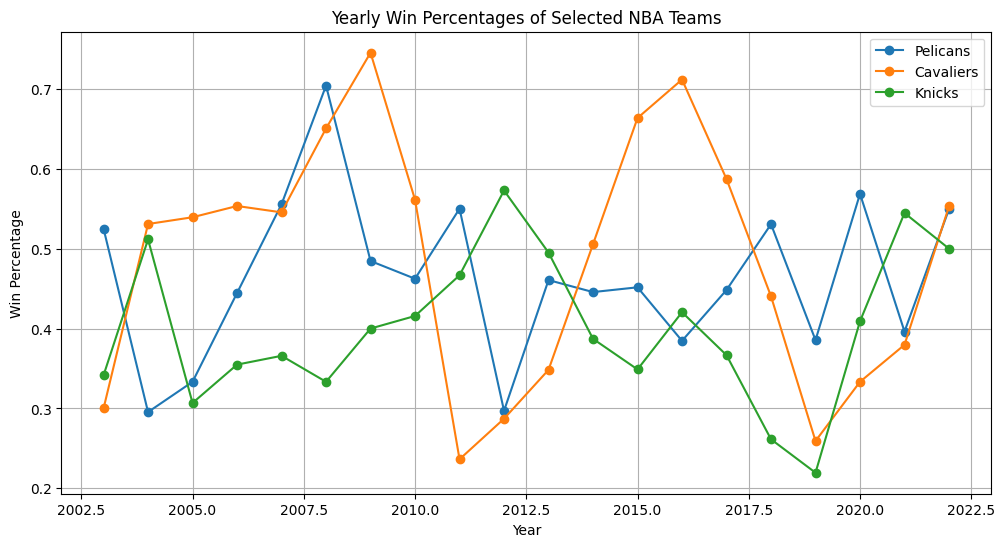

In [ ]:
import matplotlib.pyplot as plt

# Plotting win percentages
plt.figure(figsize=(12, 6))
for team_name in win_percentages_df.columns[1:]:
    plt.plot(win_percentages_df['YEAR'], win_percentages_df[team_name], label=team_name, marker='o')

plt.title('Yearly Win Percentages of Selected NBA Teams')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.legend()
plt.grid(True)
plt.show()



**explanation:**

Looking at the plot, we can see that, while the win percentages of the New Orleans Pelicans, Cleveland Cavaliers, and New York Knicks vary, the data does not immediately indicate a consistent trend of decline or improvement for any team due to the absence of their star player. In terms of relevance to our study issue, this preliminary visualization reveals that the existence of a great player is not the only factor of a team's victory %. This is an important finding because it directs us to investigate other elements that may influence team success, such as the participation of supporting players, the efficacy of team strategy, and other circumstances such as injuries or schedule density.

As our study proceeds, it becomes evident that a deeper dig is required to properly comprehend the complexities of how the absence of a great player influences team relationships. This will include examining beyond win percentages and into other statistical categories, as well as doing numerous hypothesis tests to determine whether there is a statistically significant influence on other facets of the game when the star player is not there. For example, although the overall victory % may stay consistent, changes in the team's playing style, defensive numbers, or scoring distribution may occur.

The plot provides a visual reference as we explore our ideas and develop our research questions, setting the scene for our analysis. It serves as a reminder that, although the presence of a great player is important, basketball is a team sport in which the collective effort frequently dictates the result of games. Our following research will very certainly include these larger team dynamics in order to offer a more complete understanding of the consequences of a great player's absence.


# First Research Question



When a player with the highest points per game (the "star player") doesn't play a game, what effect does that have on the team overall?


**Null hypothesis**: for a team, the distribution of the team's average field goal percentage is the same in games where the star player is present as compared to games where the star player is not present; the difference in sample is due to random chance

**Alternative hypothesis**: for a team, the distribution of the team's average field goal percentage is higher in games where the star player is present as compared to games where the star player is not present

Similar null and alternative hypotheses can be constructed for different statistics.

Let's check out a few rows of the DataFrame we'll be using for this problem!

In [ ]:
stats_df = pd.DataFrame({"team" : team,
                       "star_present" : star_present,
                       "fgp" : fgp,
                       "tpp" : tpp,
                       "blk" : blk,
                       "ast" : ast,
                       "stl" : stl,
                       "to" : to})
stats_df.sample(8)

ValueError: ignored

Now let's calculate the observed differences in field goal percentage when the star player is present/not present.

In [ ]:
observed_differences_fgp = {}
observed_differences_tpp = {}
observed_differences_blk = {}
observed_differences_ast = {}
observed_differences_stl = {}
observed_differences_to = {}

for t in team_names:
  team_df = stats_df[stats_df["team"] == t]
  star = team_df[team_df['star_present'] == 1]
  no_star = team_df[team_df['star_present'] == 0]

  observed_differences_fgp[t] = np.mean(star['fgp']) - np.mean(no_star['fgp'])
  observed_differences_tpp[t] = np.mean(star['tpp']) - np.mean(no_star['tpp'])
  observed_differences_blk[t] = np.mean(star['blk']) - np.mean(no_star['blk'])
  observed_differences_ast[t] = np.mean(star['ast']) - np.mean(no_star['ast'])
  observed_differences_stl[t] = np.mean(star['stl']) - np.mean(no_star['stl'])
  observed_differences_to[t] = np.mean(star['to']) - np.mean(no_star['to'])

#observed_differences_fgp

Now let's use strategies from A/B testing to simulate differences between means of shuffled & bootstrapped version of our DataFrame. We're shuffling the labels of whether the star player was present in the game or not.

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

repetitions = 2000

differences_fgp = {}
differences_tpp = {}
differences_blk = {}
differences_ast = {}
differences_stl = {}
differences_to = {}

for i in range(repetitions):
  for t in team_names:
    team_df = stats_df[stats_df["team"] == t]
    team_df['shuffled_star_present'] = team_df['star_present'].sample(n = len(team_df), replace = True).values
    star = team_df[team_df['shuffled_star_present'] == 1]
    no_star = team_df[team_df['shuffled_star_present'] == 0]

    fgp_d = np.mean(star['fgp']) - np.mean(no_star['fgp'])
    tpp_d = np.mean(star['tpp']) - np.mean(no_star['tpp'])
    blk_d = np.mean(star['blk']) - np.mean(no_star['blk'])
    ast_d = np.mean(star['ast']) - np.mean(no_star['ast'])
    stl_d = np.mean(star['stl']) - np.mean(no_star['stl'])
    to_d = np.mean(star['to']) - np.mean(no_star['to'])

    if t in differences_fgp:
      differences_fgp[t].append(fgp_d)
      differences_tpp[t].append(tpp_d)
      differences_blk[t].append(blk_d)
      differences_ast[t].append(ast_d)
      differences_stl[t].append(stl_d)
      differences_to[t].append(to_d)

    else:
      differences_fgp[t] = [fgp_d]
      differences_tpp[t] = [tpp_d]
      differences_blk[t] = [blk_d]
      differences_ast[t] = [ast_d]
      differences_stl[t] = [stl_d]
      differences_to[t] = [to_d]

Now let's calculate p-values for each team; we're essentially calculating the proportion of boostrapped shuffled samples where the difference in mean field goal percentage was greater than the observed differences calculated earlier!

Keep in mind that the calculation is based on whether the star player contributes to a *higher* field goal percentage on average, not whether they have a significant impact on the field goal percentage.

In [ ]:
p_values_fgp = {}
p_values_tpp = {}
p_values_blk = {}
p_values_ast = {}
p_values_stl = {}
p_values_to = {}

for t in team_names:
  fgp_p = np.count_nonzero(np.array(differences_fgp[t]) >= observed_differences_fgp[t]) / repetitions
  tpp_p = np.count_nonzero(np.array(differences_tpp[t]) >= observed_differences_tpp[t]) / repetitions
  blk_p = np.count_nonzero(np.array(differences_blk[t]) >= observed_differences_blk[t]) / repetitions
  ast_p = np.count_nonzero(np.array(differences_ast[t]) >= observed_differences_ast[t]) / repetitions
  stl_p = np.count_nonzero(np.array(differences_stl[t]) >= observed_differences_stl[t]) / repetitions
  to_p = np.count_nonzero(np.array(differences_to[t]) >= observed_differences_to[t]) / repetitions

  if t in p_values_fgp:
    p_values_fgp[t].append(fgp_p)
    p_values_tpp[t].append(tpp_p)
    p_values_blk[t].append(blk_p)
    p_values_ast[t].append(ast_p)
    p_values_stl[t].append(stl_p)
    p_values_to[t].append(to_p)

  else:
    p_values_fgp[t] = fgp_p
    p_values_tpp[t] = tpp_p
    p_values_blk[t] = blk_p
    p_values_ast[t] = ast_p
    p_values_stl[t] = stl_p
    p_values_to[t] = to_p

In [ ]:
p_data = pd.DataFrame({'team' : team_names,
                    'fgp' : p_values_fgp.values(),
                    'tpp' : p_values_tpp.values(),
                    'blk' : p_values_blk.values(),
                    'ast' : p_values_ast.values(),
                    'stl' : p_values_stl.values(),
                    'to'  : p_values_to.values()})

p_data

,team,fgp,tpp,blk,ast,stl,to
0,SAS,0.9140,0.4685,0.0215,0.6340,0.0215,0.9415
1,NOP,0.0330,0.2805,0.3175,0.8220,0.3175,0.3460
2,WAS,0.9425,0.9940,0.3410,0.9950,0.3410,0.1870
3,UTA,0.7720,0.5980,0.2775,0.7450,0.2775,0.5410
4,MIL,0.6015,0.9225,0.6305,0.9250,0.6305,0.8635
5,CLE,0.2635,0.0165,0.9430,0.5530,0.9430,0.1930
6,DET,0.3320,0.7095,0.6120,0.9835,0.6120,0.2990
7,PHI,0.8400,0.0640,0.9955,0.7305,0.9955,0.6730
8,CHI,0.3175,0.2800,0.7320,0.5830,0.7320,0.9770
9,ATL,0.0905,0.2790,0.9500,0.4855,0.9500,0.8065


In [ ]:
np.mean(differences_fgp['NOP'])

0.0006251998961013479

Our first step is to pick a threshold value to use in determining which p-values we should reject. When starting this we looked at the various methods from class. That included: just the naive threshold, BH, Bonferroni, and the LORD Algorithm. Since this is multiple hypothesis testing we want to avoid a naive threshold right away. Using just a naive threshold would add the typical type 1 error up for however many test we're doing. We wanted to pick a threshold with less type 1 error than that. Second, we have all the data, so LORD isn't needed in this case. Finally, between BH and Bonferroni, we concluded BH was the best choice for us. Making a type 1 error (or thinking that a star player had a statistically signifigant affect on a stat when they really didn't) when measured with the tradeoff of a type 2 error (or thinking that a star player doesn't have a statistically signifigant effect when they really do) doesn't seem like a horrible tradeoff. Therefore, we were willing to sacrifice some type 1 error for some more type 2 accuracy. Therefore, we picked the slightly less conservative BH method to establish our cutoff.
In picking our alpha value, we looked at similar problems in homework and industry standards and picked 0.5. That should also help balance the tradeoff between type 1 and type 2 errors.

In [ ]:
#Returns decisions on p-values using Benjamini-Hochberg
def benjamini_hochberg(p_values):
    alpha=0.05
    sorted_pvalues = list(p_values.values())
    m = len(sorted_pvalues)  # number of tests
    k = np.arange(1, m+1)
    threshold = 0;
    for i in range(len(sorted_pvalues)):
        if (sorted_pvalues[i] <= ((alpha)*(k[i]/m))):
            threshold = sorted_pvalues[i]
    return threshold

In [ ]:
print("Benjamini-Hochberg (B-H) Threshold Correction: p-values")
print("Field Goal %: " + str(benjamini_hochberg(p_values_fgp)))
print("3-Pt Field Goal %: " + str(benjamini_hochberg(p_values_tpp)))
print("Blocks per Game: " + str(benjamini_hochberg(p_values_blk)))
print("Assists per Game: " + str(benjamini_hochberg(p_values_ast)))
print("Steals per Game: " + str(benjamini_hochberg(p_values_stl)))
print("Turnovers per Game: " + str(benjamini_hochberg(p_values_to)))

Benjamini-Hochberg (B-H) Threshold Correction: p-values
Field Goal %: 0
3-Pt Field Goal %: 0
Blocks per Game: 0
Assists per Game: 0.0025
Steals per Game: 0
Turnovers per Game: 0.016


In [ ]:
#using the BH method
signifigantTeams = lambda p_vals: [k for k,v in p_vals.items() if float(v) < benjamini_hochberg(p_vals)]
signifigantTeams(p_values_fgp)
print("Teams Which Meet B-H Corrected Threshold")
print("Field Goal %: " + str(signifigantTeams(p_values_fgp)))
print("3-Pt Field Goal %: " + str(signifigantTeams(p_values_tpp)))
print("Blocks per Game: " + str(signifigantTeams(p_values_blk)))
print("Assists per Game: " + str(signifigantTeams(p_values_ast)))
print("Steals per Game: " + str(signifigantTeams(p_values_stl)))
print("Turnovers per Game: " + str(signifigantTeams(p_values_to)))

Teams Which Meet B-H Corrected Threshold
Field Goal %: []
3-Pt Field Goal %: []
Blocks per Game: []
Assists per Game: []
Steals per Game: []
Turnovers per Game: []


In [ ]:
#using the bonferroni method
bonferroni = (.05/len(team_names))
print("Bonferroni Corrected Threshold for all Statistics: " + str(np.round(bonferroni, 4)))

Bonferroni Corrected Threshold for all Statistics: 0.0017


In [ ]:
signifigantTeams = lambda p_vals: [k for k,v in p_vals.items() if float(v) < bonferroni]
print("Teams Which Meet Bonferroni Corrected Threshold")
print("Field Goal %: " + str(signifigantTeams(p_values_fgp)))
print("3-Pt Field Goal %: " + str(signifigantTeams(p_values_tpp)))
print("Blocks per Game: " + str(signifigantTeams(p_values_blk)))
print("Assists per Game: " + str(signifigantTeams(p_values_ast)))
print("Steals per Game: " + str(signifigantTeams(p_values_stl)))
print("Turnovers per Game: " + str(signifigantTeams(p_values_to)))

Teams Which Meet Bonferroni Corrected Threshold
Field Goal %: []
3-Pt Field Goal %: []
Blocks per Game: []
Assists per Game: []
Steals per Game: []
Turnovers per Game: []


In [ ]:
#using the naive method
naive = (.05)
print("Naive Threshold for all Statistics: " + str(naive))

Naive Threshold for all Statistics: 0.05


In [ ]:
signifigantTeams = lambda p_vals: [k for k,v in p_vals.items() if float(v) < naive]
print("Teams Which Meet Naive Threshold")
print("Field Goal %: " + str(signifigantTeams(p_values_fgp)))
print("3-Pt Field Goal %: " + str(signifigantTeams(p_values_tpp)))
print("Blocks per Game: " + str(signifigantTeams(p_values_blk)))
print("Assists per Game: " + str(signifigantTeams(p_values_ast)))
print("Steals per Game: " + str(signifigantTeams(p_values_stl)))
print("Turnovers per Game: " + str(signifigantTeams(p_values_to)))

Teams Which Meet Naive Threshold
Field Goal %: ['NOP']
3-Pt Field Goal %: ['CLE']
Blocks per Game: ['SAS', 'GSW']
Assists per Game: ['BKN']
Steals per Game: ['SAS', 'GSW']
Turnovers per Game: ['BKN', 'ORL', 'LAC']


#Second Research Question

Goal: Estimate the win percentage of home and away teams in basketball over several seasons using Bayesian Hierarchical Modeling

We’re picking a Beta prior for the win percentage because based on online research, we saw that if you are a home team then you have a 62.7% chance of winning, with a standard deviation of about 12.9. Those wins tend to taper out at the end.  With this information and knowing π1 and  π2 values should be bounded between 0 and 1, a beta distribution makes the most sense to use. That also makes sense with our domain knowledge of the area, given that NBA teams tend to win more at home than away.

We did online research to find estimates of the mean and standard deviation and then used the following  equations to find the alpha and the beta,
where m = mean and V = Variance:

 alpha = ((m*m*(1-m))/V) - m

 beta = (((1-m)*(1-m)*m)/V) - (1-m)

We ultimately get out alpha = 5.3 and out beta = 3.15 for home teams and alpha = 3.15 and beta = 5.3 for visitor teams.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer_home = SimpleImputer(strategy='most_frequent')
import pymc as pm
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.INFO)
import seaborn as sns

gamesNoNull_home = imputer_home.fit_transform(expanded_games_home[["PTS_home","AST_home", "REB_home", "DREB", "BLK"]])

scaler_home = StandardScaler()
gamesNoNull_home = scaler_home.fit_transform(gamesNoNull_home)
# gamesNoNull_home = expanded_games_home.dropna()
gamesNoNull_home = pd.DataFrame(gamesNoNull_home, columns=["PTS_home","AST_home", "REB_home", "DREB", "BLK"])
gamesNoNull_home["TEAM_WINS"] = expanded_games_home["HOME_TEAM_WINS"]
gamesNoNull_home

,PTS_home,AST_home,REB_home,DREB,BLK,TEAM_WINS
0,1.697199,0.419116,0.396296,-0.437450,0.346117,1
1,1.245498,-1.313916,-0.509276,-0.080965,-0.800781,1
2,0.793797,-0.158561,-0.962063,-0.793934,-0.800781,1
3,0.718514,0.804235,0.849082,0.632004,0.728416,1
4,0.342096,-0.158561,0.547225,0.988489,0.728416,0
...,...,...,...,...,...,...
26547,-0.787157,0.226557,1.000011,0.632004,-0.036182,1
26548,-1.690559,-0.928798,-0.509276,-0.793934,0.728416,0
26549,-0.410739,1.189353,0.245367,0.453762,-0.036182,1
26550,-0.335456,-0.351120,-2.018564,-1.685146,-0.800781,1


In [ ]:
# prob = .627

V = (0.15731707317)**2
m = .627

a = ((m*m*(1-m))/V) - m
b = (((1-m)*(1-m)*m)/V) - (1-m)
#Calculate a and b
# N = gamesNoNull_home.shape[0]
with pm.Model() as model:

  # pi = pm.Flat('pi')
  # pi = pm.Normal("pi", mu = mean, sigma = sd)
  pi = pm.Beta("pi", alpha = a, beta = b)

  X = pm.Bernoulli("X", pi, observed = gamesNoNull_home["TEAM_WINS"]) #This will output n amount of 1s and 0s

  trace = pm.sample(500, chains=4, tune=1000, return_inferencedata=False, progressbar=False)

Alpha = 5.298052429043762  and Beta = 3.1517919553960487
Mean: 0.5890720013256275


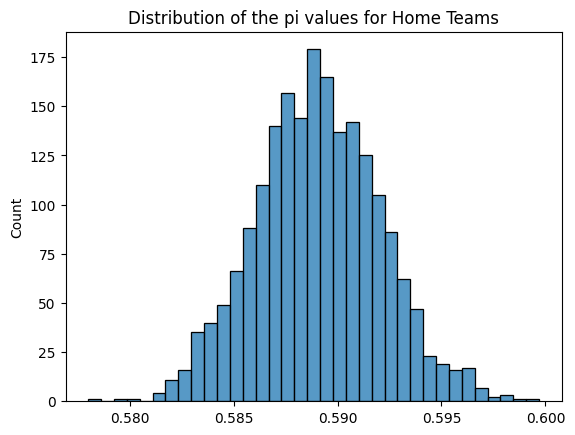

In [ ]:
sns.histplot(trace["pi"])
plt.title("Distribution of the pi values for Home Teams")
print("Alpha =", a, " and Beta =", b)
print("Mean:", np.mean(trace["pi"]))

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer_home = SimpleImputer(strategy='mean')
gamesNoNull_away = imputer_home.fit_transform(expanded_games_away[["PTS_away","AST_away", "REB_away", "DREB", "BLK"]])

scaler_home = StandardScaler()
gamesNoNull_away = scaler_home.fit_transform(gamesNoNull_away)

gamesNoNull_away = pd.DataFrame(gamesNoNull_away, columns=["PTS_away","AST_away", "REB_away", "DREB", "BLK"])
gamesNoNull_away["TEAM_WINS"] = 1 - expanded_games_away["HOME_TEAM_WINS"]
gamesNoNull_away

,PTS_away,AST_away,REB_away,DREB,BLK,TEAM_WINS
0,1.217668,0.291392,0.288807,-0.270257,-1.069767,0
1,0.845523,-0.289947,-0.782690,0.448912,-1.069767,0
2,0.398949,-0.289947,0.594949,0.269120,0.160129,0
3,-0.568629,-1.258846,0.594949,0.628705,-1.479733,0
4,0.696665,-0.289947,0.748020,1.347874,-0.249836,1
...,...,...,...,...,...,...
26547,-1.015203,-0.871286,0.135736,-0.090465,-0.659802,0
26548,-1.164061,-0.871286,0.748020,1.347874,-0.659802,1
26549,-0.419771,-0.483727,0.135736,-0.270257,0.980060,0
26550,-0.494200,-0.677506,0.441878,0.089327,-0.249836,0


In [ ]:
V = (0.15731707317)**2
m = (1 - .627)

a2 = ((m*m*(1-m))/V) - m
b2 = (((1-m)*(1-m)*m)/V) - (1-m)

with pm.Model() as model:

  # pi = pm.Flat('pi')
  # pi = pm.Normal("pi", mu = mean, sigma = sd)
  pi = pm.Beta("pi", alpha = a, beta = b)

  X = pm.Bernoulli("X", pi, observed = gamesNoNull_away["TEAM_WINS"]) #This will output n amount of 1s and 0s

  trace2 = pm.sample(500, chains=4, tune=1000, return_inferencedata=False, progressbar=False)
# model.debug()

Alpha = 3.1517919553960487  and Beta = 5.298052429043762
Mean: 0.4109543666400856


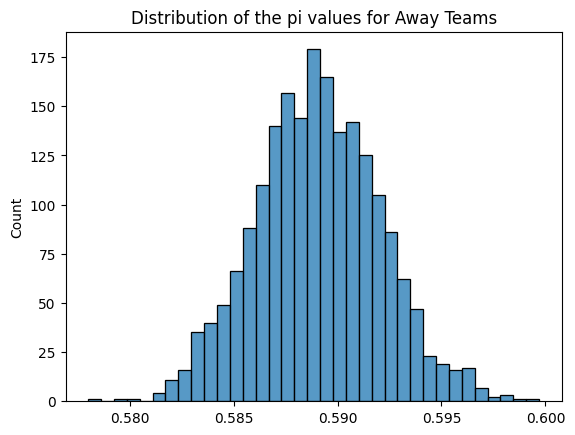

In [ ]:
sns.histplot(trace["pi"])
plt.title("Distribution of the pi values for Away Teams")
print("Alpha =", a2, " and Beta =", b2)
print("Mean:", np.mean(trace2["pi"]))

# Third Research Question

Can we use random forests and logistic regression to predict which team
will win out of a certain head to head match up?


We started by trying out several different types of models to see which was the most accurate between our training and testing data.



**Overall Notes of Approach - Made by Purbasha**

For the Logistic Model, we were interested in trying out two different models. Model One would be using the features that are most commonly used to evaluate how well a team is performing, which is by Points, Rebounds, and Assists. Model Two will be using the features that our heat correlation map showed us to be the most important features which are: Points, Defensive Rebounds, Assists, and Blocks. In order to select which model would be better to use we will be using the model slection metrics AIC and Deviance. We will be using AIC because this model selection is a good metric to use when there are more features in this case, as it penalizes mdoels which uses more features. In this case, model two has one more feature than model one. We will also be looking at the Deviance as in Model Two we are using Defensive Rebounds instead of overall rebounds which is used in Model one. This will help us see if the change in variables has helped increase the performance of the model, as deviance tell us how much worse the model is from a perfectly/saturated model.

**Looking at the HOME Team Stats**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer_home = SimpleImputer(strategy='mean')
gamesNoNull_home = imputer_home.fit_transform(expanded_games_home[["PTS_home","AST_home", "REB_home", "DREB", "BLK"]])

scaler_home = StandardScaler()
gamesNoNull_home = scaler_home.fit_transform(gamesNoNull_home)
# gamesNoNull_home = expanded_games_home.dropna()
gamesNoNull_home = pd.DataFrame(gamesNoNull_home, columns=["PTS_home","AST_home", "REB_home", "DREB", "BLK"])
gamesNoNull_home["TEAM_WINS"] = expanded_games_home["HOME_TEAM_WINS"]
gamesNoNull_home

,PTS_home,AST_home,REB_home,DREB,BLK,TEAM_WINS
0,1.697199,0.419116,0.396296,-0.437450,0.346117,1
1,1.245498,-1.313916,-0.509276,-0.080965,-0.800781,1
2,0.793797,-0.158561,-0.962063,-0.793934,-0.800781,1
3,0.718514,0.804235,0.849082,0.632004,0.728416,1
4,0.342096,-0.158561,0.547225,0.988489,0.728416,0
...,...,...,...,...,...,...
26547,-0.787157,0.226557,1.000011,0.632004,-0.036182,1
26548,-1.690559,-0.928798,-0.509276,-0.793934,0.728416,0
26549,-0.410739,1.189353,0.245367,0.453762,-0.036182,1
26550,-0.335456,-0.351120,-2.018564,-1.685146,-0.800781,1


In [ ]:
#Using the regular three features
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(gamesNoNull_home[["PTS_home","AST_home", "REB_home"]], gamesNoNull_home["TEAM_WINS"], test_size=0.30, random_state=1)

In [ ]:
#Using one more feature, and DREB instead of REB
X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(gamesNoNull_home[["PTS_home","AST_home", "DREB", "BLK"]], gamesNoNull_home["TEAM_WINS"], test_size=0.30, random_state=1)

**MODEL 1: With the regular three features**

In [ ]:
#With the regular three features
Y = y_train_org.to_numpy()
X = X_train_org.astype(int)
X = sm.add_constant(X)
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
print(logistic_model.summary())
y_train_org.shape, X_train_org.shape

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18582
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10902.
Date:                Sun, 10 Dec 2023   Deviance:                       21804.
Time:                        23:36:53   Pearson chi2:                 2.06e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1671
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4020      0.016     24.409      0.0

((18586,), (18586, 3))

In [ ]:
X_test = sm.add_constant(X_test_org)
yhat = logistic_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_org, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_org, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", logistic_model.aic)
print("Model Deviance = ", logistic_model.deviance)

Confusion Matrix : 
 [[2087 1141]
 [1231 3507]]
Test accuracy =  0.702234496610595
FDP =  0.3534696406443618
Model AIC =  21812.16976806821
Model Deviance =  21804.16976806821


**MODEL 2: Using one more feature, and DREB instead of REB**

In [ ]:
Y = y_train_more.to_numpy()
X = X_train_more.astype(int)
X = sm.add_constant(X)
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
print(logistic_model.summary())
y_train_more.shape, X_train_more.shape

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18581
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10691.
Date:                Sun, 10 Dec 2023   Deviance:                       21382.
Time:                        23:37:02   Pearson chi2:                 2.34e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1858
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4137      0.017     24.735      0.0

((18586,), (18586, 4))

In [ ]:
X_test = sm.add_constant(X_test_more)
yhat = logistic_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_more, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_more, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", logistic_model.aic)
print("Model Deviance = ", logistic_model.deviance)

Confusion Matrix : 
 [[2165 1063]
 [1198 3540]]
Test accuracy =  0.7161687170474517
FDP =  0.32930607187112765
Model AIC =  21391.834955171522
Model Deviance =  21381.834955171522


**Notes for the comparison**

Model One AIC: 21812.16976806821

Model One Deviance:  21804.16976806821



Model Two AIC: 21391.834955171522

Model Two Deviance:  21381.834955171522

When looking a the above metrics, we can see that model two out performs both models and the AIC and Deviance of model two is lower than the AIC and Deviance of Model one.


**Looking at the AWAY Team Stats**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer_home = SimpleImputer(strategy='mean')
gamesNoNull_away = imputer_home.fit_transform(expanded_games_away[["PTS_away","AST_away", "REB_away", "DREB", "BLK"]])

scaler_home = StandardScaler()
gamesNoNull_away = scaler_home.fit_transform(gamesNoNull_away)

gamesNoNull_away = pd.DataFrame(gamesNoNull_away, columns=["PTS_away","AST_away", "REB_away", "DREB", "BLK"])
gamesNoNull_away["TEAM_WINS"] = 1 - expanded_games_away["HOME_TEAM_WINS"]
gamesNoNull_away

,PTS_away,AST_away,REB_away,DREB,BLK,TEAM_WINS
0,1.217668,0.291392,0.288807,-0.270257,-1.069767,0
1,0.845523,-0.289947,-0.782690,0.448912,-1.069767,0
2,0.398949,-0.289947,0.594949,0.269120,0.160129,0
3,-0.568629,-1.258846,0.594949,0.628705,-1.479733,0
4,0.696665,-0.289947,0.748020,1.347874,-0.249836,1
...,...,...,...,...,...,...
26547,-1.015203,-0.871286,0.135736,-0.090465,-0.659802,0
26548,-1.164061,-0.871286,0.748020,1.347874,-0.659802,1
26549,-0.419771,-0.483727,0.135736,-0.270257,0.980060,0
26550,-0.494200,-0.677506,0.441878,0.089327,-0.249836,0


In [ ]:
#Using the regular three features
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(gamesNoNull_away[["PTS_away","AST_away", "REB_away"]], gamesNoNull_home["TEAM_WINS"], test_size=0.30, random_state=1)

In [ ]:
#Using one more feature, and DREB instead of REB
X_train_more, X_test_more, y_train_more, y_test_more = train_test_split(gamesNoNull_away[["PTS_away","AST_away", "DREB", "BLK"]], gamesNoNull_home["TEAM_WINS"], test_size=0.30, random_state=1)

**Model One: With the Three Regular Features**

In [ ]:
#With the regular three features
Y = y_train_org.to_numpy()
X = X_train_org.astype(int)
X = sm.add_constant(X)
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
print(logistic_model.summary())
y_train_org.shape, X_train_org.shape

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18582
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10924.
Date:                Sun, 10 Dec 2023   Deviance:                       21847.
Time:                        23:39:10   Pearson chi2:                 1.92e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1651
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4189      0.016     25.516      0.0

((18586,), (18586, 3))

In [ ]:
X_test = sm.add_constant(X_test_org)
yhat = logistic_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_org, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_org, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", logistic_model.aic)
print("Model Deviance = ", logistic_model.deviance)

Confusion Matrix : 
 [[1941 1287]
 [1084 3654]]
Test accuracy =  0.7023600301280442
FDP =  0.3986988847583643
Model AIC =  21855.423307996334
Model Deviance =  21847.423307996334


**Model Two: Using one more feature, and DREB instead of REB**

In [ ]:
Y = y_train_more.to_numpy()
X = X_train_more.astype(int)
X = sm.add_constant(X)
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial()).fit()
print(logistic_model.summary())
y_train_more.shape, X_train_more.shape

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18581
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10653.
Date:                Sun, 10 Dec 2023   Deviance:                       21307.
Time:                        23:39:27   Pearson chi2:                 1.95e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1891
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4177      0.017     25.049      0.0

((18586,), (18586, 4))

In [ ]:
X_test = sm.add_constant(X_test_more)
yhat = logistic_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_more, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_more, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", logistic_model.aic)
print("Model Deviance = ", logistic_model.deviance)

Confusion Matrix : 
 [[2057 1171]
 [1078 3660]]
Test accuracy =  0.7176751192568416
FDP =  0.3627633209417596
Model AIC =  21316.608088777208
Model Deviance =  21306.608088777208


**Overall Notes for Vistor Team**
Model One AIC:  21855.423307996334

Model One Deviance: 21847.423307996334

Model Two AIC: 21316.608088777208

Model Two Deviance:  21306.608088777208

When looking a the above metrics, we can see that model two out performs both models and the AIC and Deviance of model two is lower than the AIC and Deviance of Model one. This is the same conclusion we came to for the home team models.


All other models

In [ ]:
Y = np.asarray(y_train_org)

X = X_train_org
X = sm.add_constant(X)
negbinom_model = sm.GLM(Y, X, family=sm.families.NegativeBinomial(alpha=7)).fit()
print(negbinom_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18582
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27748.
Date:                Mon, 11 Dec 2023   Deviance:                       3654.8
Time:                        00:11:31   Pearson chi2:                 1.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01944
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6201      0.022    -28.101      0.0

In [ ]:
X_test = sm.add_constant(X_test_org)
yhat = negbinom_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_org, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_org, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", negbinom_model.aic)

Confusion Matrix : 
 [[2104 1124]
 [1242 3496]]
Test accuracy =  0.70298769771529
FDP =  0.34820322180916974
Model AIC =  55503.84129737348


In [ ]:
Y = np.asarray(y_train_org)

X = X_train_org.astype(int)
X = sm.add_constant(X)
poisson_model = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18586
Model:                            GLM   Df Residuals:                    18582
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16087.
Date:                Mon, 11 Dec 2023   Deviance:                       10361.
Time:                        00:12:38   Pearson chi2:                 7.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06586
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5860      0.010    -58.166      0.0

In [ ]:
X_test = sm.add_constant(X_test)
yhat = poisson_model.predict(X_test)
yhat[yhat>0.5] = 1
yhat[yhat<=0.5] = 0
cm = confusion_matrix(y_test_org, yhat)
print ("Confusion Matrix : \n", cm)
FDP = cm[0,1]/(cm[0,0] + cm[0,1])
print ('Test accuracy = ', accuracy_score(y_test_org, yhat))
print ('FDP = ', FDP)
print("Model AIC = ", poisson_model.aic)

Confusion Matrix : 
 [[2029 1199]
 [1168 3570]]
Test accuracy =  0.7028621641978409
FDP =  0.3714374225526642
Model AIC =  32182.685106296016


# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# games = pd.read_csv('games.csv')

# Prepare the data for the home team model

home_features = expanded_games_home[['PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'STL',
       'BLK', 'TO', 'PF']]
home_target = expanded_games_home['HOME_TEAM_WINS']

# Prepare the data for the away team model
away_features = expanded_games_away[['PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'STL',
       'BLK', 'TO', 'PF']]
away_target = 1 - expanded_games_away['HOME_TEAM_WINS']

# Impute missing values with the mean
imputer_home = SimpleImputer(strategy='mean')
home_features = imputer_home.fit_transform(home_features)

imputer_away = SimpleImputer(strategy='mean')
away_features = imputer_away.fit_transform(away_features)

# Normalize the features
scaler_home = StandardScaler()
home_features = scaler_home.fit_transform(home_features)

scaler_away = StandardScaler()
away_features = scaler_away.fit_transform(away_features)

# Split data into training and testing sets for both models
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(
    home_features, home_target, test_size=0.3, random_state=42, stratify=home_target)
X_away_train, X_away_test, y_away_train, y_away_test = train_test_split(
    away_features, away_target, test_size=0.3, random_state=42, stratify=away_target)

# Train the Random Forest model for home team
rf_home = RandomForestClassifier(n_estimators=100, random_state=42)
rf_home.fit(X_home_train, y_home_train)

# Train the Random Forest model for away team
rf_away = RandomForestClassifier(n_estimators=100, random_state=42)
rf_away.fit(X_away_train, y_away_train)

# Predict and evaluate the model for home team
y_home_pred = rf_home.predict(X_home_test)
home_accuracy = accuracy_score(y_home_test, y_home_pred)
home_confusion = confusion_matrix(y_home_test, y_home_pred)
home_report = classification_report(y_home_test, y_home_pred)
FDP_home = home_confusion[0,1]/(home_confusion[0,0] + home_confusion[0,1])

# Predict and evaluate the model for away team
y_away_pred = rf_away.predict(X_away_test)
away_accuracy = accuracy_score(y_away_test, y_away_pred)
away_confusion = confusion_matrix(y_away_test, y_away_pred)
away_report = classification_report(y_away_test, y_away_pred)
FDP_away = away_confusion[0,1]/(away_confusion[0,0] + away_confusion[0,1])

# Print the evaluation results for home team
print("Home Team Model Evaluation:")
print("Accuracy:", home_accuracy)
print("Confusion Matrix:\n", home_confusion)
print("Classification Report:\n", home_report)
print("FDP of Home:\n", FDP_home)

# Print the evaluation results for away team
print("\nAway Team Model Evaluation:")
print("Accuracy:", away_accuracy)
print("Confusion Matrix:\n", away_confusion)
print("Classification Report:\n", away_report)
print("FDP of Away:\n", FDP_away)


Home Team Model Evaluation:
Accuracy: 0.8065528496108461
Confusion Matrix:
 [[2371  901]
 [ 640 4054]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      3272
           1       0.82      0.86      0.84      4694

    accuracy                           0.81      7966
   macro avg       0.80      0.79      0.80      7966
weighted avg       0.81      0.81      0.81      7966

FDP of Home:
 0.27536674816625917

Away Team Model Evaluation:
Accuracy: 0.8155912628671855
Confusion Matrix:
 [[4088  606]
 [ 863 2409]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      4694
           1       0.80      0.74      0.77      3272

    accuracy                           0.82      7966
   macro avg       0.81      0.80      0.81      7966
weighted avg       0.81      0.82      0.81      7966

FDP of Away:
 0.12910097997443545


# Methods

**What we're trying to predict**
*   We're trying to predict who won a game or not from a variety of stats. For the random forest model, we have no choice over which features we're using given it's a nonparametric method. For the GLM's though we did go through a selection process in terms of which variables provided us with the best results. We ultimately selected points, rebounds, and assists per game. We selected those by measuring the effect on the AIC. These variables gave us the lowest AIC, likely because adding more stats didn't help as much as adding the extra variables brought the AIC down.

**GLM**
*   We are ultimately selecting logistic regression because it fits what we want to measure the best. Here, we're going to use stats from a given game to predict whether a team won or lost the game. Logistic regression over the other GLMs handles binary data. We'll try the other models because they were in our hypothesis, but given that they don't handle binary, we'll likely get results over 1, which demonstrate they can't be used to predict wins or losses. We're assuming here that the wins and losses are binary data.

**Nonparametric**
*   We're chosing to use a random forest model for our nonparametric data. A random forest model suits our data structure given we have many types of stats, including binary ones, and we want to predict just wins and losses. Also, we can look if we want to and see how decisions are made after we use the model, which helps with interpretability over some other nonparametric methods.

**Evaluation strategy**
*   For both of the models, we're going to use the accuracy and FDP. We think by using both of these we'll balance getting true postives and also not too many falsely identified wins.



### Results

**Random Forest:**
- The Random Forest model provided an accuracy of approximately 80.65% for home teams and 81.5% for away teams. This suggests that the features used are relevant and have predictive power. However, there is room for improvement as the model incorrectly predicts about 20% of the data.


**GLM (Negative Binomial & Poisson):**
- Both the Negative Binomial and Poisson models seem to have significant coefficients, indicating that the features used have a statistically significant effect on the number of wins. The Negative Binomial model's use indicates over-dispersion in the count data, which it can handle better than the Poisson model.
- The Negative Binomial model showed a Log-Likelihood of -27748 and an AIC of 55503.84, while the Poisson model had a Log-Likelihood of-16087 and an AIC of 32182.69, suggesting that the Poisson model fits the data better due to a lower AIC.
**GLM (Logistic Regression):**
- The Logistic Regression model, with a Pseudo R-squared of .1858 and an AIC of  21391.834955171522, indicates a decent model fit, although the R-squared value suggests that there is still unexplained variability in the outcomes.

### Uncertainty Estimation

**GLM Models:**
- The standard errors for the coefficients provide an estimate of the uncertainty. For example, the coefficient for PTS_home in the logistic model is 1.0814 with a standard error of 0.033, indicating that the true coefficient is most likely within the range of 1.016 to 1.147 with a 95% confidence interval.

- This uncertainty can be quantitatively stated as: "For every one unit increase in home points, the log odds of the home team winning increase by between 1.016 to 1.147, with a 95% level of confidence."


### Discussion

**Model Performance Comparison:**
- Based on AIC, the Logistic Regression model performed the best among the GLMs, suggesting it might be the most suitable for future predictions. However, the Random Forest model may still be preferred for its predictive power and ability to model complex non-linear relationships.
- Confidence in applying these models to future datasets is moderate. The models have shown reasonable predictive ability, but the accuracy indicates there's a significant portion of outcomes they cannot predict.

**Model Fit:**
- The models fit the data reasonably well, but the fact that none of the models achieve extremely high accuracy or R-squared values indicates that there is complexity and variability in game outcomes that the models and features are not capturing.

**Baysian/frequentist:**
- We used a frequentist approach on both of our models as we didn't use a prior. We didn't observe any difference besides the different accuracy in estimating wins.

**Choosing Not to Provide Interpretations:**

One may choose not to delve into interpretations if the primary goal of the modeling exercise is prediction rather than explanation. If the project's stakeholders are more interested in the accuracy of future game outcomes rather than understanding the underlying factors that drive those outcomes, the focus will be on the model's predictive performance.
Another reason might be the lack of domain-specific knowledge to make accurate interpretations. Without deep expertise in basketball analytics, interpretations might be speculative and potentially misleading.

**Limitations of the Models:**
- The Random Forest model is a black-box and may not provide as much interpretability as GLMs. GLMs, while interpretable, make stronger assumptions about the data distribution and may not capture complex patterns as well as Random Forest.

**Additional Data for Improvement:**
- Incorporating additional context-specific variables such as player injuries, rest days, home-court advantage, and individual player stats could potentially improve model performance.

**Uncertainty in Results:**
- The uncertainty in the results can be considered moderate given the accuracy levels achieved. Factors contributing to this uncertainty include potential data noise, overfitting, unaccounted variables, and inherent unpredictability in sports outcomes.
